# Environment setup

### Library preparation

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import pandas as pd
pd.set_eng_float_format(accuracy=1, use_eng_prefix=True)

import numpy as np

import os

import matplotlib.pyplot as plt

import qcodes as qc
from qcodes.dataset.plotting import plot_by_id, get_data_by_id, plot_dataset
from qcodes.dataset.data_set import load_by_id
from qcodes.instrument.parameter import Parameter


from si_prefix import si_format as SI

In [3]:
import sys 
sys.path.append('..\..\_jjtools')

# from Exps import *

from JJ_data_processing import read_opj_data, pbi, bpbi, show_df, update_df

from JJformulas import *
from meas_util import *

from JJmeasurement import *

D:\anaconda\lib\site-packages\qcodes\dataset\database.py:13: UserWarning: The module `qcodes.dataset.database` is deprecated.
Public features are available at the import of `qcodes`.
Private features are available in `qcodes.dataset.sqlite.*` modules.
  warnings.warn('The module `qcodes.dataset.database` is deprecated.\n'
D:\anaconda\lib\site-packages\tqdm\autonotebook\__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


### Database ini

In [4]:
SAMPLE = 'D059BBN2'

jj = JJmeas(sample = SAMPLE)

jj.db_connect()

# Sample discription and runid matrix

In [5]:
full_table = pd.read_excel("..\chain table.xlsx")


In [6]:
show_df(full_table, 
         find = SAMPLE
         )

,Ajj,Ec,Ej,Iab,Isw,N,Npar,Rn,Rn_tot,Ro,RoFF,Ro_tot,Vo_tot,dsgn,status,wp
D059BBN2,40.0f,185.9m,77.4m,3.2n,320.0f,20,2.0,87.5k,1750000,11.8M,903.2M,236.7M,1.4m,Fin,fabd,339.4m
D059BBN2_n,22.5f,309.9m,104.2m,4.4n,NaN,30,2.0,65.0k,1950000,NaN,NaN,NaN,0.0y,x_L,fabd,508.4m


# Import from origin

In [7]:
Vmock = Parameter(name = 'Voltage', label = 'Voltage', unit = 'V')
Imock = Parameter(name = 'Current', label = 'Current', unit = 'A')

<IPython.core.display.Javascript object>


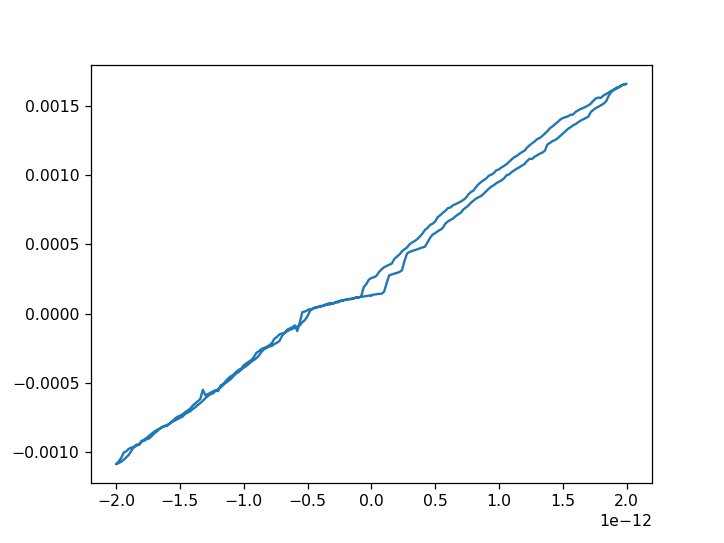

In [12]:
x, y = read_opj_data(cols = (4,5), preprint = True)

In [13]:
runid = jj.mock_meas( x = (Imock, x), y = (Vmock, y) , label = 'IVC fine')


Starting experimental run with id: 2


# Report

## Overview IVC

<IPython.core.display.Javascript object>


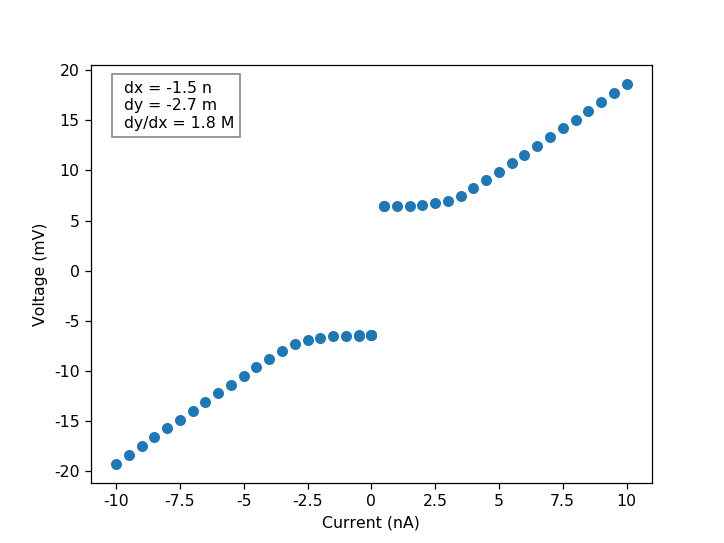

In [10]:
pbi(1, interactive = True)

**Vg = 6.4 mV**

**N = 16** 

**Rn_tot = 1.8M**


## IVC fine scan

<IPython.core.display.Javascript object>


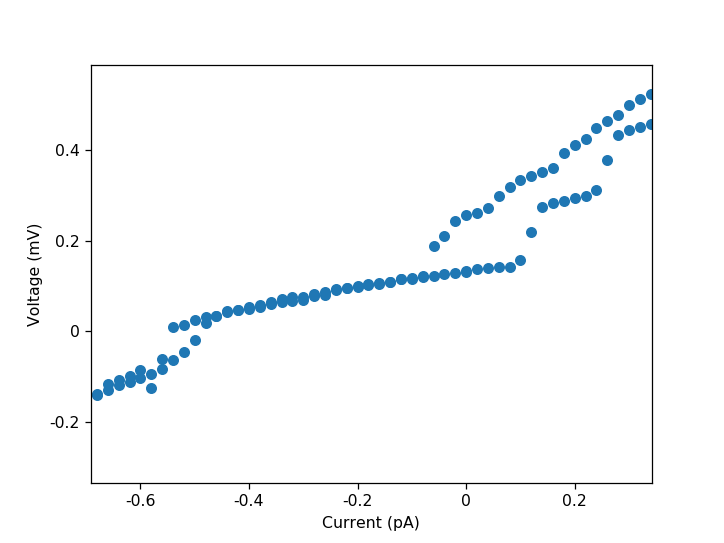

In [14]:
pbi(2, interactive = True)

**Ro_tot = 200 MOhm**

**Isw = 310fA**

# Datatable update

In [15]:
ft = pd.read_excel("..\chain table.xlsx")

show_df(ft, 
         find = SAMPLE
         )

,Ajj,Ec,Ej,Iab,Isw,N,Npar,Rn,Rn_tot,Ro,RoFF,Ro_tot,Vo_tot,dsgn,status,wp
D059BBN2,40.0f,185.9m,77.4m,3.2n,320.0f,20,2.0,87.5k,1750000,11.8M,903.2M,236.7M,1.4m,Fin,fabd,339.4m
D059BBN2_n,22.5f,309.9m,104.2m,4.4n,NaN,30,2.0,65.0k,1950000,NaN,NaN,NaN,0.0y,x_L,fabd,508.4m


In [16]:
ft = update_df(ft, SAMPLE, 
         
              {'Rn_tot'  : 1.8e6,
               'Ro_tot'  : 200e6,
               'Isw'     : 310e-15,
               'N'       : 16,
               'Ajj'     : 40e-15,
               'status'  : 'measd_lv'
             })

show_df(ft, 
       find = SAMPLE)

,Ajj,Ec,Ej,Iab,Isw,N,Npar,Rn,Rn_tot,Ro,RoFF,Ro_tot,Vo_tot,dsgn,status,wp
D059BBN2,40.0f,185.9m,60.2m,2.5n,310.0f,16,2.0,112.5k,1.8M,12.5M,903.2M,200.0M,1.4m,Fin,measd_lv,299.3m
D059BBN2_n,22.5f,309.9m,104.2m,4.4n,NaN,30,2.0,65.0k,2.0M,NaN,NaN,NaN,0.0y,x_L,fabd,508.4m


In [17]:
ft.to_excel("..\chain table.xlsx")